<a href="https://colab.research.google.com/github/Ahasva/monte_carlo_simulation/blob/develop/Kopie_von_mcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:red">Monte Carlo Simulation</span>

#### v1.1.0

In [212]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

li = []                                                           # empty list "li" takes number of days passed

def mcs_int():
  item_count = pbi_count
  loop_count = 0
  while item_count > 0:
    integer = np.random.randint(0, tp_int + 1)
    item_count -= integer
    loop_count += 1
  li.append(loop_count)
  #return loop_count

def mcs_float():
  item_count = float(pbi_count)
  loop_count = 0
  while item_count > 0:
    #integer = np.random.randint(0, tp_int + 1)
    float_num = np.random.uniform(tp_float) # new
    #item_count -= integer
    item_count -= float_num
    loop_count += 1
  li.append(loop_count)
  return loop_count

pbi_count = int(input("input item count: "))                      # the variable "x" takes the item count input, which basically
intended_runs = int(input("input number of intended MCS runs: ")) # select number of simulation runs

while True:
    test_var = input("Select a TP: Is your TP is higher than 1 select [y/n]: ")
    if test_var == "y":
        tp_int = int(input("input work item Throughput (TP): ")) # select the teams work item throughput
        for i in range(intended_runs):
          mcs_int()
        tp = tp_int
        break
    elif test_var == "n":
        tp_float = float(input("input work item Throughput (TP): "))
        for i in range(intended_runs):
          mcs_float()
        tp = tp_float
        break
    else:
        print("Your answer was neither 'yes' nor 'no'! Please choose!")

print(li)
len(li)

input item count: 30
input number of intended MCS runs: 10000
Select a TP: Is your TP is higher than 1 select [y/n]: y
input work item Throughput (TP): 3
[24, 28, 21, 20, 14, 24, 26, 22, 20, 19, 30, 13, 20, 20, 17, 21, 20, 16, 19, 27, 25, 23, 20, 15, 21, 18, 19, 20, 21, 16, 26, 22, 22, 19, 19, 26, 17, 23, 21, 21, 20, 14, 20, 20, 20, 15, 20, 17, 18, 22, 21, 22, 18, 18, 24, 20, 22, 22, 22, 19, 18, 16, 15, 24, 18, 18, 18, 21, 20, 24, 26, 17, 21, 26, 24, 19, 19, 19, 19, 25, 20, 21, 24, 16, 20, 27, 20, 21, 16, 19, 21, 22, 20, 22, 21, 16, 23, 16, 24, 18, 19, 20, 18, 18, 24, 23, 15, 21, 26, 18, 16, 21, 24, 19, 19, 17, 20, 21, 21, 18, 22, 25, 16, 17, 18, 19, 18, 24, 20, 21, 16, 22, 15, 25, 22, 22, 20, 25, 19, 25, 26, 22, 22, 22, 17, 25, 22, 18, 29, 21, 17, 21, 15, 19, 23, 18, 19, 19, 14, 17, 22, 22, 20, 18, 19, 28, 19, 18, 24, 18, 22, 22, 18, 17, 29, 24, 18, 14, 16, 23, 19, 22, 20, 20, 21, 21, 17, 19, 24, 15, 21, 23, 20, 23, 24, 16, 28, 20, 26, 19, 20, 18, 21, 15, 19, 21, 22, 15, 23, 22, 18, 2

10000

In [127]:
mcs_series = pd.Series(li, name="Monte Carlo Simulation")

In [128]:
mcs_series.info(), mcs_series.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Monte Carlo Simulation
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


(None,
 count    10000.000000
 mean        20.384800
 std          3.392209
 min         12.000000
 25%         18.000000
 50%         20.000000
 75%         22.000000
 max         40.000000
 Name: Monte Carlo Simulation, dtype: float64)

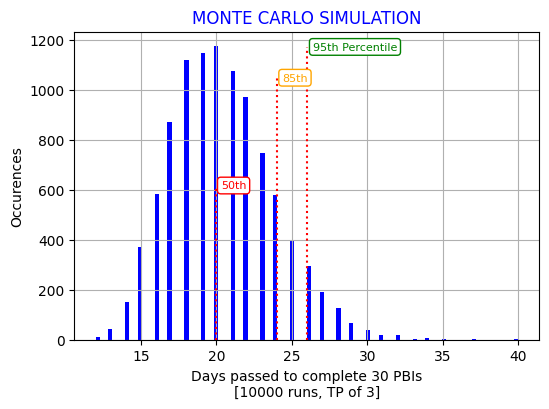

In [129]:
fig, ax = plt.subplots(figsize=(6,4))
mcs_series.plot(kind="hist", color="blue", alpha=1, bins=100)
#mcs_series.plot(kind="kde")

y_lim = ax.get_ylim()
y = y_lim[1]
y_lim, y

quant_50, quant_85, quant_95 = mcs_series.quantile(0.5), mcs_series.quantile(0.85), mcs_series.quantile(0.95)
quant_50, quant_85, quant_95

x_50 = quant_50 + (quant_50 * 0.015)
x_85 = quant_85 + (quant_85 * 0.015)
x_95 = quant_95 + (quant_95 * 0.015)
y_50 = y - (y * 0.5)
y_85 = y - (y * 0.15)
y_95 = y - (y * 0.05)

quants = [[quant_50, 1, 0.5], [quant_85, 1, 0.85], [quant_95, 1, 0.95]]
for i in quants:
  plt.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="red")

ax.text(x_50, y_50, "50th", horizontalalignment="left", verticalalignment="center", size=8, alpha=1, color="red",
        bbox=dict(facecolor="white", edgecolor="red", boxstyle="round"))
ax.text(x_85, y_85, "85th", horizontalalignment="left", verticalalignment="center", size=8, alpha=1, color="orange",
        bbox=dict(facecolor="white", edgecolor="orange", boxstyle='round'))
ax.text(x_95, y_95, "95th Percentile",  horizontalalignment="left", verticalalignment="center",size=8, alpha=1, color="green",
        bbox=dict(facecolor="white", edgecolor="green", boxstyle="round"))


ax.set(title="MONTE CARLO SIMULATION", xlabel=f"Days passed to complete {pbi_count} PBIs\n[{intended_runs} runs, TP of {tp}]", ylabel="Occurences")
ax.title.set_color("blue")
ax.xaxis.label.set_color("black")
ax.yaxis.label.set_color("black")
plt.grid(True)
plt.show()

In [ ]:
ax.get_ylim()

(0.0, 6861.75)

In [230]:
from typing import ItemsView
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import random
                                                          # empty list "li" takes number of days passed

item_output_per_time = np.array([], dtype="f")

def mcs_int():
  item_output = np.array([], dtype="f")
  days_count = 0
  items = 0.0
  loop_count = 0
  while days_count < days_left_count:
    random_tp_float = float(np.random.randint(0, tp_int + 1))
    items = items + random_tp_float
    days_count += 1
    #loop_count += 1
  item_output = np.append(item_output, items)
  return item_output

def mcs_float():
  item_count = float(pbi_count)
  loop_count = 0
  while item_count > 0:
    float_num = np.random.uniform(tp_float) # new
    item_count -= float_num
    loop_count += 1
  li.append(days_count)
  return loop_count

days_left_count = int(input("input days left: "))                      # the variable "x" takes the item count input, which basically
intended_runs = int(input("input number of intended MCS runs: ")) # select number of simulation runs

while True:
    test_var = input("Select a TP: Is your TP is higher than 1 select [y/n]: ")
    if test_var == "y":
        tp_int = int(input("input work item Throughput (TP): ")) # select the teams work item throughput
        for i in range(intended_runs):
          i_o = mcs_int()
          item_output_per_time= np.append(item_output_per_time, i_o)
        tp = tp_int
        break
    elif test_var == "n":
        tp_float = float(input("input work item Throughput (TP): "))
        for i in range(intended_runs):
          mcs_float()
        tp = tp_float
        break
    else:
        print("Your answer was neither 'yes' nor 'no'! Please choose!")


print(item_output_per_time)
item_output_per_time.shape, item_output_per_time.size, item_output_per_time.dtype, item_output_per_time.ndim
len(item_output_per_time)
#print(li)


input days left: 30
input number of intended MCS runs: 10
Select a TP: Is your TP is higher than 1 select [y/n]: y
input work item Throughput (TP): 3
[50. 44. 38. 49. 50. 38. 40. 48. 43. 45.]


10

In [133]:
item_output.dtype

dtype('float32')

In [ ]:
mcs_series = pd.Series(li, name="Monte Carlo Simulation")

In [ ]:
mcs_series.info(), mcs_series.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
mcs_series.plot(kind="hist", color="blue", alpha=1, bins=100)
#mcs_series.plot(kind="kde")

y_lim = ax.get_ylim()
y = y_lim[1]
y_lim, y

quant_50, quant_85, quant_95 = mcs_series.quantile(0.5), mcs_series.quantile(0.85), mcs_series.quantile(0.95)
quant_50, quant_85, quant_95

x_50 = quant_50 + (quant_50 * 0.015)
x_85 = quant_85 + (quant_85 * 0.015)
x_95 = quant_95 + (quant_95 * 0.015)
y_50 = y - (y * 0.5)
y_85 = y - (y * 0.15)
y_95 = y - (y * 0.05)

quants = [[quant_50, 1, 0.5], [quant_85, 1, 0.85], [quant_95, 1, 0.95]]
for i in quants:
  plt.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="red")

ax.text(x_50, y_50, "50th", horizontalalignment="left", verticalalignment="center", size=8, alpha=1, color="red",
        bbox=dict(facecolor="white", edgecolor="red", boxstyle="round"))
ax.text(x_85, y_85, "85th", horizontalalignment="left", verticalalignment="center", size=8, alpha=1, color="orange",
        bbox=dict(facecolor="white", edgecolor="orange", boxstyle='round'))
ax.text(x_95, y_95, "95th Percentile",  horizontalalignment="left", verticalalignment="center",size=8, alpha=1, color="green",
        bbox=dict(facecolor="white", edgecolor="green", boxstyle="round"))


ax.set(title="MONTE CARLO SIMULATION", xlabel=f"Days passed to complete {pbi_count} PBIs\n[{intended_runs} runs, TP of {tp}]", ylabel="Occurences")
ax.title.set_color("blue")
ax.xaxis.label.set_color("black")
ax.yaxis.label.set_color("black")
plt.grid(True)
plt.show()

In [229]:
y_a = np.array([])

def test():
  x = 0
  zz = 0
  a = np.array([])
  while x < 10:
    x +=1
    rr = np.random.randint(10)
    zz += rr
  a = np.append(a,zz)
  return a

for i in range(100):
  Y = test()
  y_a = np.append(y_a,Y)

print(y_a)
y_a.size

[55. 56. 38. 45. 50. 61. 31. 41. 62. 64. 36. 47. 50. 48. 42. 29. 48. 49.
 61. 39. 34. 39. 38. 46. 20. 51. 28. 42. 30. 54. 48. 39. 31. 57. 45. 71.
 23. 45. 41. 34. 54. 56. 55. 41. 34. 39. 51. 53. 31. 49. 60. 52. 33. 62.
 51. 54. 43. 51. 38. 38. 35. 39. 51. 42. 51. 44. 39. 35. 35. 46. 43. 40.
 37. 48. 52. 41. 25. 52. 39. 31. 52. 30. 57. 46. 44. 22. 45. 59. 61. 40.
 48. 49. 46. 22. 31. 55. 37. 52. 57. 39.]


100

In [197]:
Y

array([0., 0., 7.])

In [172]:
a

array([9., 8., 4.])

In [137]:
a

array([], dtype=float64)

In [194]:
from typing import ItemsView
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import random
                                                          # empty list "li" takes number of days passed
li = []


def mcs_int():
  days_count = 0
  items = 0
  loop_count = 0
  while days_count < days_left_count:
    random_tp_in_int = random.randint(0, tp_int)
    items = items + random_tp_in_int
    days_count += 1
    loop_count += 1
  li.append(items)

  #return random_tp_in_int

def mcs_float():
  item_count = float(pbi_count)
  loop_count = 0
  while item_count > 0:
    float_num = np.random.uniform(tp_float) # new
    item_count -= float_num
    loop_count += 1
  li.append(days_count)
  return loop_count

days_left_count = int(input("input days left: "))                      # the variable "x" takes the item count input, which basically
intended_runs = int(input("input number of intended MCS runs: ")) # select number of simulation runs

while True:
    test_var = input("Select a TP: Is your TP is higher than 1 select [y/n]: ")
    if test_var == "y":
        tp_int = int(input("input work item Throughput (TP): ")) # select the teams work item throughput
        for i in range(intended_runs):
          mcs_int()
        tp = tp_int
        break
    elif test_var == "n":
        tp_float = float(input("input work item Throughput (TP): "))
        for i in range(intended_runs):
          mcs_float()
        tp = tp_float
        break
    else:
        print("Your answer was neither 'yes' nor 'no'! Please choose!")

print(li)

#print("days_count:", days_count)
#print("loop_count:", loop_count)

input days left: 30
input number of intended MCS runs: 10
Select a TP: Is your TP is higher than 1 select [y/n]: y
input work item Throughput (TP): 1
[17, 12, 15, 15, 19, 16, 21, 15, 15, 13]
